In [1]:
%load_ext autoreload
%autoreload 2

# Baseline Evaluation with Sklearn

In [127]:
# https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [128]:
dataset = load_breast_cancer()
X, y, label_names = dataset.data, dataset.target, dataset.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
baseline_model = LogisticRegression(max_iter=100)
baseline_model.fit(X_train, y_train)

/home/awu/miniconda3/envs/wsldev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Evaluation

In [130]:
def evaluate(model):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy*100:.2f}%')

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
    disp.plot(cmap=plt.cm.Blues)  # You can change the color map if you like
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 96.49%


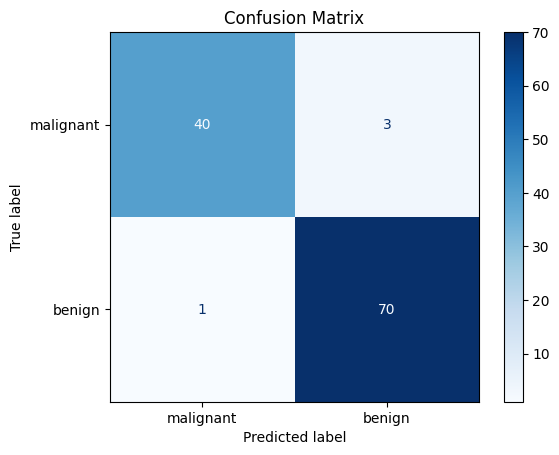

In [131]:
evaluate(baseline_model)

# Testing My Implementation

In [132]:
from logistic_regression import LogisticRegression as MyLogisticRegression

In [133]:
my_model = MyLogisticRegression()
my_model.fit(X_train, y_train)

/home/awu/StuffFromScratch/LogisticRegression/logistic_regression.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


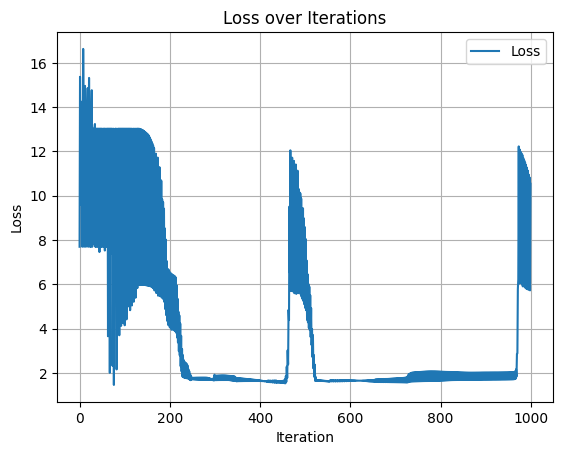

In [134]:
plt.plot(my_model.losses, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 93.86%


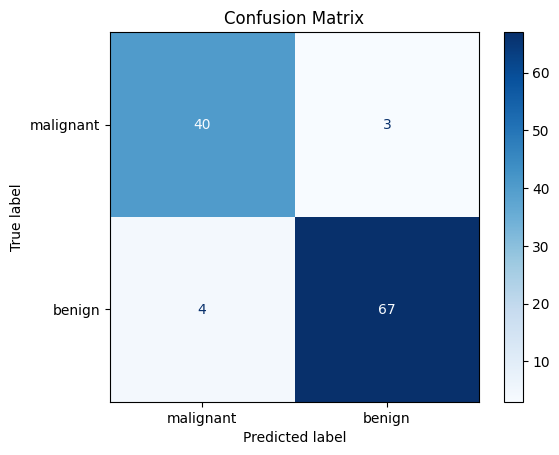

In [125]:
evaluate(my_model)